### Import Libraries

In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Linear Regression

In [131]:
class LinearRegression:
    def __init__(self, learning_rate=0.0001, iterations=20):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.m = 0
        self.c = 0
        self.costs = []

    # Gradient Descent
    def fit(self, X, y):
        n = len(X)
        for i in range(self.iterations):
            y_pred = self.m*X + self.c
            # gradient of cost function with respect to m and c
            D_m = (-1/n) * sum(X * (y - y_pred))
            D_c = (-1/n) * sum(y - y_pred)
            #update parameters
            self.m = self.m - self.learning_rate * D_m
            self.c = self.c - self.learning_rate * D_c
            #calculate and store cost
            cost = self.mean_squared_error(y, y_pred)
            self.costs.append(cost)

    # Cost function (Mean Squared Error)
    def mean_squared_error(self, y, y_pred):
        return np.mean((y - y_pred) ** 2)/2

    def predict(self, X):
        return self.m*X + self.c

    # Plot cost vs iterations
    def plot_cost(self):
        plt.plot(self.costs)
        plt.xlabel('Iterations')
        plt.ylabel('Cost')
        plt.title('Cost vs Iterations')
        plt.show()

    def plot_regression_line(self, X, y):
        plt.scatter(X, y, color='b', label='Data')
        plt.plot(X, self.predict(X), color='r', label='Regression Line')
        plt.xlabel('X')
        plt.ylabel('y')
        plt.title('Regression Line')
        plt.legend()
        plt.show()

### Loading Data

In [132]:
data = pd.read_csv('Linear Regression Dataset.csv')
X = data.iloc[:, 0].values.reshape(-1, 1)
y = data.iloc[:, 1].values.reshape(-1, 1)

### Training the Model

In [133]:
linear_regression = LinearRegression()
linear_regression.fit(X, y)

### Plotting Cost vs Iterations

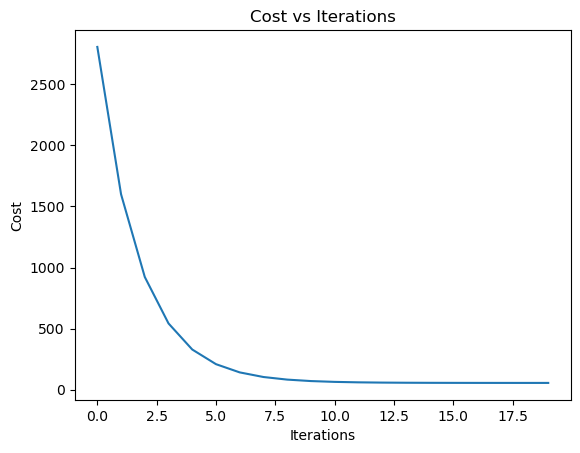

In [134]:
linear_regression.plot_cost()

### Plotting the Regression Line

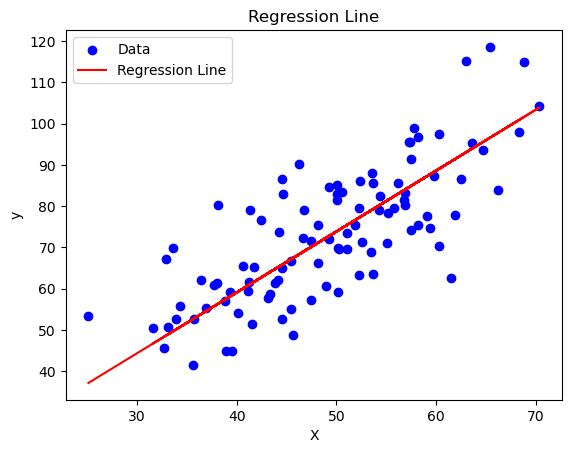

In [135]:
linear_regression.plot_regression_line(X, y)

### Comparing Predictions with Actual Data

In [136]:
y_pred = linear_regression.predict(X)
compare = pd.DataFrame({'Actual': y.flatten(), 'Predicted': y_pred.flatten()})
print(compare)

       Actual  Predicted
0   68.777596  78.911051
1   62.562382  90.875448
2   71.546632  70.124525
3   87.230925  88.340182
4   78.211518  81.443710
..        ...        ...
94  81.536991  73.896137
95  72.111832  72.729147
96  85.232007  73.910018
97  66.224958  71.119968
98  53.454394  37.130331

[99 rows x 2 columns]
